<a href="https://colab.research.google.com/github/haleelsada/MY-PROJECTS/blob/main/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python

In [38]:
#we're using opencv library for face detection from an image
import cv2
#cascade is a xml file,they are kind of pretrained models for detection
#there are multiple trained cascades for different object detections(like face, eye, full body)
#we can train one to detect the object we want without much effort
#I'm using haarcascade_frontalface_default.xml cascade
#they use pretty much old algorithm(2001)

#first add xml file and image to colab
cascPath = '/content/haarcascade_frontalface_default.xml'

In [48]:
# Create the haar cascade object
faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image as cv2 ojects
image = cv2.imread('/content/deadpool.jpeg')
# change to black n white
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [49]:
# Detect faces in the image
face = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

The *detectMultiScale* function is a general function that detects objects. Since we are calling it on the face cascade, that’s what it detects.

The first option is the grayscale image.

The second is the *scaleFactor*. Since some faces may be closer to the camera, they would appear bigger than the faces in the back. The scale factor compensates for this.

The detection algorithm uses a moving window to detect objects. *minNeighbors* defines how many objects are detected near the current one before it declares the face found. *minSize*, meanwhile, gives the size of each window.

Note: I took commonly used values for these fields. In real life, you would experiment with different values for the window size, scale factor, and so on until you found one that works best for you.

**The function returns** a list of rectangles in which it believes it found a face. Next, we will loop over where it thinks it found something.

In [50]:
#check is it working
face

()

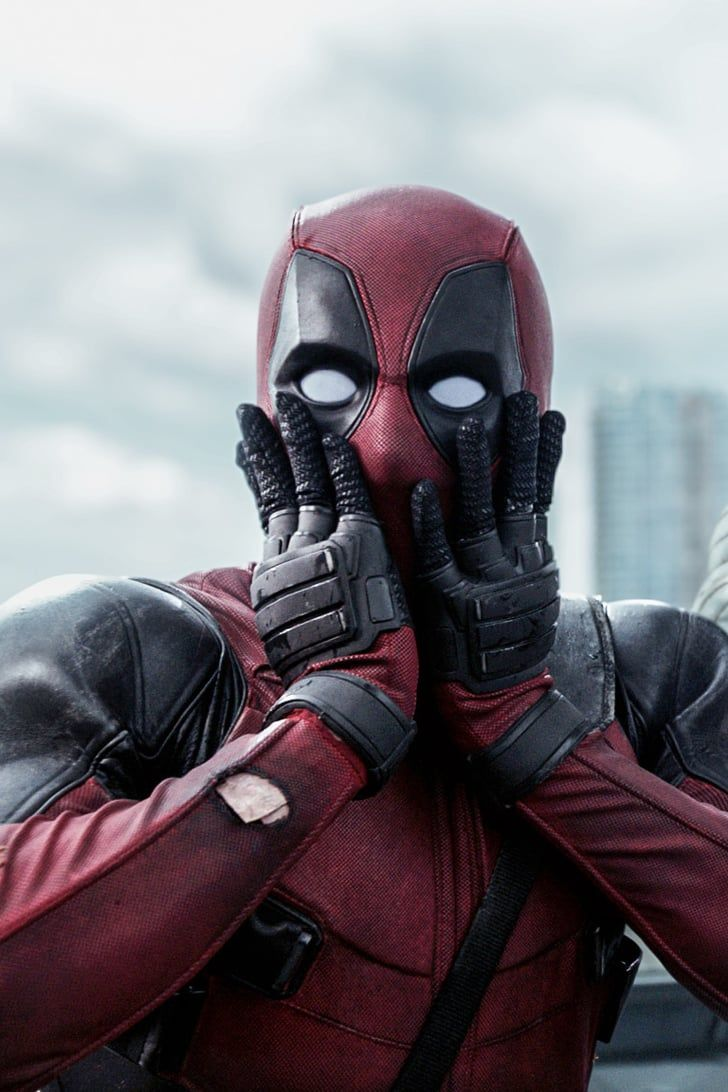

In [51]:
#now we have to visualze the faces it detected on the image
for (x, y, w, h) in face:
    cv2.rectangle(image, (x, y), (x+w, y+h), (300, 255, 0), 2)
#cv2.rectangle(image, start_point, end_point, color, thickness)
#it is a method to draw rectangle around pictures

#we can't use imshow in colab so...
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
#remember it can find most of the faces (even cartoons or designs) but it will show not so good result with one side image or image 
#with distorted objects like hand over eye